In [36]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from LSTM_for_Stock.data_processor import DataLoader
from LSTM_for_Stock.data_processor import FeaturesAppender
from LSTM_for_Stock.model import Model
from LSTM_for_Stock import unit
import pandas as pd
import numpy as np

import traceback

In [37]:
def do(code, benchmark='399300', use_slope=True, train_epochs=10, window=10, days=3, norm=True, split=0.15, features_appender=None, top=30):
    dataloader = DataLoader(code, benchmark, 
                            features_appender=features_appender)
    model = Model()
    comp = {"optimizer": "adam",
            "loss": "mse",
            "metrics": [
                "mae",
                "acc"
            ]}
    layers = [{'units': 500, 'type': 'lstm'},
              {'units': 1 if use_slope else days, 'type': 'dense'}]
    train = {'epochs': train_epochs, 'verbose': 2,
             'validation_split': split, 'batch_size': 128}

    model.build_model(layers, comp)
    X_tra, Y_tra = dataloader.get_train_data(window, days, norm)
    X_tra_round = np.round(X_tra, 2)
    if use_slope:
        Y_tra_slope = np.round(unit.calc_slope(Y_tra), 4)
        history = model.train(X_tra_round, Y_tra_slope, train)
    else:
        Y_tra_round = np.round(Y_tra, 4)
        history = model.train(X_tra_round, Y_tra_round, train)
    unit.plot_history(history)

    X_val, Y_val = dataloader.get_valid_data(window, days, norm)
    X_val_round = np.round(X_val, 2)
    score=None
    if use_slope:
        Y_val_slope = np.round(unit.calc_slope(Y_val), 4)
        score=model.evaluate(X_val_round, Y_val_slope, {'batch_size': 128})
    else:
        Y_val_round = np.round(Y_val, 4)
        score=model.evaluate(X_val_round, Y_val_round, {'batch_size': 128})
    
    for i in range(len(model.model.metrics_names)):
        print('{0}:{1}'.format(model.model.metrics_names[i],score[i]))
    
    try:
        pred_slope = model.predict(X_val_round, {'batch_size': 128})
        data_online = DataLoader(code, benchmark, split=0,
                                 start=dataloader._df_valid.index[0].strftime('%Y-%m-%d'), online=True)
        X_online = data_online.get_train_data(window, days, norm)[0][:, 0, 0]
        # 验证集误差计算
        unit.plot_result_by_slope(X_online, pred_slope, window, days, top=top).show()
    except Exception as e:
        print(e)
        traceback.print_exc()

Train on 2256 samples, validate on 399 samples
Epoch 1/5000
 - 7s - loss: 0.0310 - mean_absolute_error: 0.1410 - acc: 0.0417 - val_loss: 0.0206 - val_mean_absolute_error: 0.1154 - val_acc: 0.0576
Epoch 2/5000
 - 2s - loss: 0.0227 - mean_absolute_error: 0.1191 - acc: 0.0417 - val_loss: 0.0124 - val_mean_absolute_error: 0.0902 - val_acc: 0.0576
Epoch 3/5000
 - 2s - loss: 0.0153 - mean_absolute_error: 0.0978 - acc: 0.0417 - val_loss: 0.0142 - val_mean_absolute_error: 0.0952 - val_acc: 0.0576
Epoch 4/5000
 - 2s - loss: 0.0129 - mean_absolute_error: 0.0888 - acc: 0.0417 - val_loss: 0.0100 - val_mean_absolute_error: 0.0787 - val_acc: 0.0576
Epoch 5/5000
 - 2s - loss: 0.0131 - mean_absolute_error: 0.0923 - acc: 0.0417 - val_loss: 0.0103 - val_mean_absolute_error: 0.0813 - val_acc: 0.0576
Epoch 6/5000
 - 2s - loss: 0.0103 - mean_absolute_error: 0.0791 - acc: 0.0417 - val_loss: 0.0115 - val_mean_absolute_error: 0.0853 - val_acc: 0.0576
Epoch 7/5000
 - 2s - loss: 0.0095 - mean_absolute_error: 0.

Epoch 56/5000
 - 2s - loss: 0.0012 - mean_absolute_error: 0.0256 - acc: 0.0417 - val_loss: 0.0017 - val_mean_absolute_error: 0.0320 - val_acc: 0.0576
Epoch 57/5000
 - 2s - loss: 0.0012 - mean_absolute_error: 0.0254 - acc: 0.0417 - val_loss: 0.0016 - val_mean_absolute_error: 0.0302 - val_acc: 0.0576
Epoch 58/5000
 - 2s - loss: 0.0011 - mean_absolute_error: 0.0252 - acc: 0.0417 - val_loss: 0.0014 - val_mean_absolute_error: 0.0285 - val_acc: 0.0576
Epoch 59/5000
 - 2s - loss: 0.0011 - mean_absolute_error: 0.0249 - acc: 0.0417 - val_loss: 0.0014 - val_mean_absolute_error: 0.0282 - val_acc: 0.0576
Epoch 60/5000
 - 2s - loss: 0.0011 - mean_absolute_error: 0.0246 - acc: 0.0417 - val_loss: 0.0014 - val_mean_absolute_error: 0.0285 - val_acc: 0.0576
Epoch 61/5000
 - 2s - loss: 0.0011 - mean_absolute_error: 0.0244 - acc: 0.0417 - val_loss: 0.0015 - val_mean_absolute_error: 0.0297 - val_acc: 0.0576
Epoch 62/5000
 - 2s - loss: 0.0011 - mean_absolute_error: 0.0242 - acc: 0.0417 - val_loss: 0.0014 - 

Epoch 109/5000
 - 2s - loss: 7.5859e-04 - mean_absolute_error: 0.0199 - acc: 0.0417 - val_loss: 8.3427e-04 - val_mean_absolute_error: 0.0216 - val_acc: 0.0576
Epoch 110/5000
 - 2s - loss: 7.6205e-04 - mean_absolute_error: 0.0200 - acc: 0.0417 - val_loss: 7.7612e-04 - val_mean_absolute_error: 0.0207 - val_acc: 0.0576
Epoch 111/5000
 - 2s - loss: 8.1432e-04 - mean_absolute_error: 0.0210 - acc: 0.0417 - val_loss: 0.0012 - val_mean_absolute_error: 0.0281 - val_acc: 0.0576
Epoch 112/5000
 - 2s - loss: 8.5729e-04 - mean_absolute_error: 0.0218 - acc: 0.0417 - val_loss: 8.3014e-04 - val_mean_absolute_error: 0.0217 - val_acc: 0.0576
Epoch 113/5000
 - 2s - loss: 7.9517e-04 - mean_absolute_error: 0.0206 - acc: 0.0417 - val_loss: 8.1163e-04 - val_mean_absolute_error: 0.0214 - val_acc: 0.0576
Epoch 114/5000
 - 2s - loss: 7.8829e-04 - mean_absolute_error: 0.0203 - acc: 0.0417 - val_loss: 8.8837e-04 - val_mean_absolute_error: 0.0228 - val_acc: 0.0576
Epoch 115/5000
 - 2s - loss: 7.9778e-04 - mean_abs

Epoch 161/5000
 - 2s - loss: 7.0938e-04 - mean_absolute_error: 0.0189 - acc: 0.0417 - val_loss: 6.0749e-04 - val_mean_absolute_error: 0.0184 - val_acc: 0.0576
Epoch 00161: early stopping
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 500)               1022000   
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 501       
Total params: 1,022,501
Trainable params: 1,022,501
Non-trainable params: 0
_________________________________________________________________


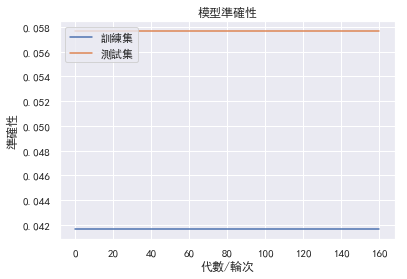

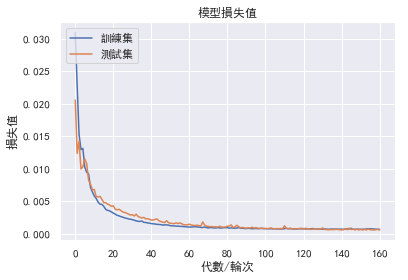

286/286 [==============================] - ETA:  - 0s 388us/step
loss:0.0020269692693902115
mean_absolute_error:0.031461353511451844
acc:0.03846153861784435


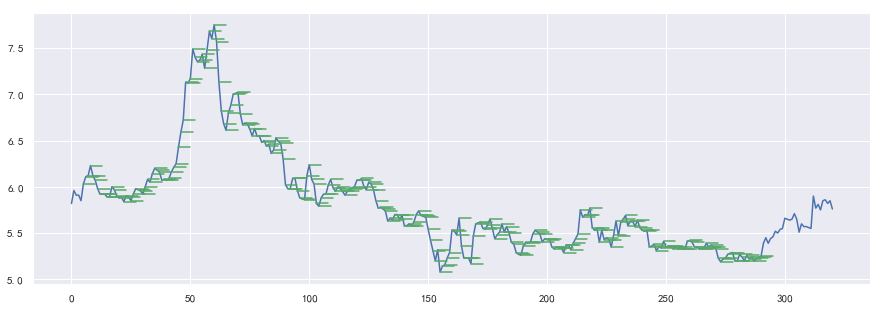

In [34]:
do('601398',train_epochs=5000,  window=5, days=5)

Train on 2252 samples, validate on 398 samples
Epoch 1/5000
 - 8s - loss: 0.0717 - mean_absolute_error: 0.1926 - acc: 0.0377 - val_loss: 0.0302 - val_mean_absolute_error: 0.1388 - val_acc: 0.0578
Epoch 2/5000
 - 4s - loss: 0.0249 - mean_absolute_error: 0.1263 - acc: 0.0417 - val_loss: 0.0286 - val_mean_absolute_error: 0.1327 - val_acc: 0.0553
Epoch 3/5000
 - 3s - loss: 0.0163 - mean_absolute_error: 0.1013 - acc: 0.0417 - val_loss: 0.0195 - val_mean_absolute_error: 0.1120 - val_acc: 0.0578
Epoch 4/5000
 - 4s - loss: 0.0154 - mean_absolute_error: 0.0996 - acc: 0.0417 - val_loss: 0.0156 - val_mean_absolute_error: 0.1024 - val_acc: 0.0578
Epoch 5/5000
 - 4s - loss: 0.0122 - mean_absolute_error: 0.0884 - acc: 0.0417 - val_loss: 0.0179 - val_mean_absolute_error: 0.1091 - val_acc: 0.0578
Epoch 6/5000
 - 4s - loss: 0.0100 - mean_absolute_error: 0.0784 - acc: 0.0417 - val_loss: 0.0126 - val_mean_absolute_error: 0.0896 - val_acc: 0.0578
Epoch 7/5000
 - 3s - loss: 0.0085 - mean_absolute_error: 0.

Epoch 56/5000
 - 4s - loss: 0.0013 - mean_absolute_error: 0.0274 - acc: 0.0417 - val_loss: 0.0018 - val_mean_absolute_error: 0.0342 - val_acc: 0.0578
Epoch 57/5000
 - 4s - loss: 0.0013 - mean_absolute_error: 0.0273 - acc: 0.0417 - val_loss: 0.0015 - val_mean_absolute_error: 0.0291 - val_acc: 0.0578
Epoch 58/5000
 - 3s - loss: 0.0012 - mean_absolute_error: 0.0260 - acc: 0.0417 - val_loss: 0.0014 - val_mean_absolute_error: 0.0285 - val_acc: 0.0578
Epoch 59/5000
 - 3s - loss: 0.0012 - mean_absolute_error: 0.0261 - acc: 0.0417 - val_loss: 0.0014 - val_mean_absolute_error: 0.0284 - val_acc: 0.0578
Epoch 60/5000
 - 4s - loss: 0.0012 - mean_absolute_error: 0.0257 - acc: 0.0417 - val_loss: 0.0014 - val_mean_absolute_error: 0.0293 - val_acc: 0.0578
Epoch 61/5000
 - 4s - loss: 0.0012 - mean_absolute_error: 0.0260 - acc: 0.0417 - val_loss: 0.0015 - val_mean_absolute_error: 0.0288 - val_acc: 0.0578
Epoch 62/5000
 - 4s - loss: 0.0012 - mean_absolute_error: 0.0257 - acc: 0.0417 - val_loss: 0.0014 - 

Epoch 110/5000
 - 3s - loss: 7.9007e-04 - mean_absolute_error: 0.0202 - acc: 0.0417 - val_loss: 7.8350e-04 - val_mean_absolute_error: 0.0209 - val_acc: 0.0578
Epoch 111/5000
 - 3s - loss: 8.0807e-04 - mean_absolute_error: 0.0206 - acc: 0.0417 - val_loss: 8.1593e-04 - val_mean_absolute_error: 0.0216 - val_acc: 0.0578
Epoch 112/5000
 - 3s - loss: 7.9222e-04 - mean_absolute_error: 0.0203 - acc: 0.0417 - val_loss: 7.5673e-04 - val_mean_absolute_error: 0.0206 - val_acc: 0.0578
Epoch 113/5000
 - 3s - loss: 7.7182e-04 - mean_absolute_error: 0.0200 - acc: 0.0417 - val_loss: 7.9616e-04 - val_mean_absolute_error: 0.0215 - val_acc: 0.0578
Epoch 114/5000
 - 3s - loss: 7.9221e-04 - mean_absolute_error: 0.0204 - acc: 0.0417 - val_loss: 7.3730e-04 - val_mean_absolute_error: 0.0204 - val_acc: 0.0578
Epoch 115/5000
 - 3s - loss: 7.9048e-04 - mean_absolute_error: 0.0204 - acc: 0.0417 - val_loss: 7.6653e-04 - val_mean_absolute_error: 0.0209 - val_acc: 0.0578
Epoch 116/5000
 - 3s - loss: 7.8986e-04 - mean

Epoch 162/5000
 - 3s - loss: 7.5451e-04 - mean_absolute_error: 0.0198 - acc: 0.0417 - val_loss: 7.4406e-04 - val_mean_absolute_error: 0.0211 - val_acc: 0.0578
Epoch 163/5000
 - 3s - loss: 7.3664e-04 - mean_absolute_error: 0.0193 - acc: 0.0417 - val_loss: 5.8675e-04 - val_mean_absolute_error: 0.0181 - val_acc: 0.0578
Epoch 164/5000
 - 3s - loss: 7.1039e-04 - mean_absolute_error: 0.0189 - acc: 0.0417 - val_loss: 6.9388e-04 - val_mean_absolute_error: 0.0203 - val_acc: 0.0578
Epoch 165/5000
 - 3s - loss: 7.4990e-04 - mean_absolute_error: 0.0198 - acc: 0.0417 - val_loss: 5.8187e-04 - val_mean_absolute_error: 0.0180 - val_acc: 0.0578
Epoch 166/5000
 - 3s - loss: 7.3236e-04 - mean_absolute_error: 0.0196 - acc: 0.0417 - val_loss: 6.4391e-04 - val_mean_absolute_error: 0.0193 - val_acc: 0.0578
Epoch 00166: early stopping
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 500)     

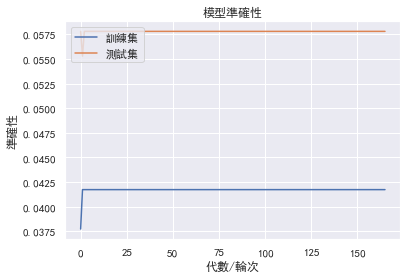

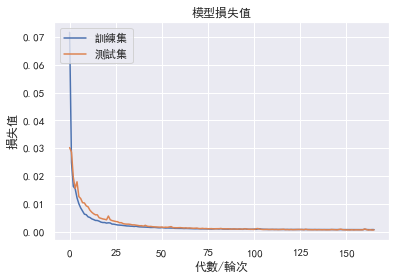

281/281 [==============================] - ETA:  - ETA:  - 0s 544us/step
loss:0.0019917244537405376
mean_absolute_error:0.03155841752621627
acc:0.039145907234678916


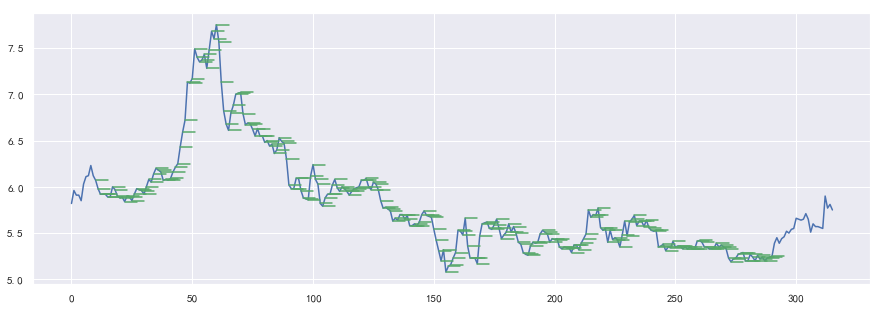

In [38]:
do('601398',train_epochs=5000,  window=10, days=5)

Train on 2248 samples, validate on 397 samples
Epoch 1/5000
 - 9s - loss: 0.0507 - mean_absolute_error: 0.1725 - acc: 0.0400 - val_loss: 0.0558 - val_mean_absolute_error: 0.1840 - val_acc: 0.0504
Epoch 2/5000
 - 4s - loss: 0.0312 - mean_absolute_error: 0.1376 - acc: 0.0414 - val_loss: 0.0384 - val_mean_absolute_error: 0.1612 - val_acc: 0.0579
Epoch 3/5000
 - 4s - loss: 0.0249 - mean_absolute_error: 0.1255 - acc: 0.0418 - val_loss: 0.0257 - val_mean_absolute_error: 0.1294 - val_acc: 0.0579
Epoch 4/5000
 - 4s - loss: 0.0180 - mean_absolute_error: 0.1062 - acc: 0.0418 - val_loss: 0.0224 - val_mean_absolute_error: 0.1194 - val_acc: 0.0579
Epoch 5/5000
 - 4s - loss: 0.0159 - mean_absolute_error: 0.0972 - acc: 0.0418 - val_loss: 0.0235 - val_mean_absolute_error: 0.1251 - val_acc: 0.0579
Epoch 6/5000
 - 4s - loss: 0.0127 - mean_absolute_error: 0.0879 - acc: 0.0418 - val_loss: 0.0127 - val_mean_absolute_error: 0.0893 - val_acc: 0.0579
Epoch 7/5000
 - 4s - loss: 0.0095 - mean_absolute_error: 0.

Epoch 56/5000
 - 5s - loss: 0.0012 - mean_absolute_error: 0.0268 - acc: 0.0418 - val_loss: 0.0017 - val_mean_absolute_error: 0.0319 - val_acc: 0.0579
Epoch 57/5000
 - 5s - loss: 0.0012 - mean_absolute_error: 0.0261 - acc: 0.0418 - val_loss: 0.0015 - val_mean_absolute_error: 0.0310 - val_acc: 0.0579
Epoch 58/5000
 - 5s - loss: 0.0011 - mean_absolute_error: 0.0256 - acc: 0.0418 - val_loss: 0.0015 - val_mean_absolute_error: 0.0306 - val_acc: 0.0579
Epoch 59/5000
 - 4s - loss: 0.0011 - mean_absolute_error: 0.0258 - acc: 0.0418 - val_loss: 0.0016 - val_mean_absolute_error: 0.0312 - val_acc: 0.0579
Epoch 60/5000
 - 4s - loss: 0.0011 - mean_absolute_error: 0.0253 - acc: 0.0418 - val_loss: 0.0014 - val_mean_absolute_error: 0.0299 - val_acc: 0.0579
Epoch 61/5000
 - 4s - loss: 0.0011 - mean_absolute_error: 0.0256 - acc: 0.0418 - val_loss: 0.0015 - val_mean_absolute_error: 0.0309 - val_acc: 0.0579
Epoch 62/5000
 - 4s - loss: 0.0011 - mean_absolute_error: 0.0253 - acc: 0.0418 - val_loss: 0.0014 - 

Epoch 109/5000
 - 4s - loss: 7.9479e-04 - mean_absolute_error: 0.0209 - acc: 0.0418 - val_loss: 0.0010 - val_mean_absolute_error: 0.0251 - val_acc: 0.0579
Epoch 110/5000
 - 4s - loss: 7.9960e-04 - mean_absolute_error: 0.0207 - acc: 0.0418 - val_loss: 7.6878e-04 - val_mean_absolute_error: 0.0210 - val_acc: 0.0579
Epoch 111/5000
 - 4s - loss: 7.7421e-04 - mean_absolute_error: 0.0204 - acc: 0.0418 - val_loss: 8.4109e-04 - val_mean_absolute_error: 0.0221 - val_acc: 0.0579
Epoch 112/5000
 - 4s - loss: 8.5176e-04 - mean_absolute_error: 0.0216 - acc: 0.0418 - val_loss: 7.3806e-04 - val_mean_absolute_error: 0.0205 - val_acc: 0.0579
Epoch 113/5000
 - 4s - loss: 7.3993e-04 - mean_absolute_error: 0.0196 - acc: 0.0418 - val_loss: 8.2660e-04 - val_mean_absolute_error: 0.0223 - val_acc: 0.0579
Epoch 114/5000
 - 4s - loss: 7.3215e-04 - mean_absolute_error: 0.0194 - acc: 0.0418 - val_loss: 8.4314e-04 - val_mean_absolute_error: 0.0226 - val_acc: 0.0579
Epoch 115/5000
 - 4s - loss: 7.1842e-04 - mean_abs

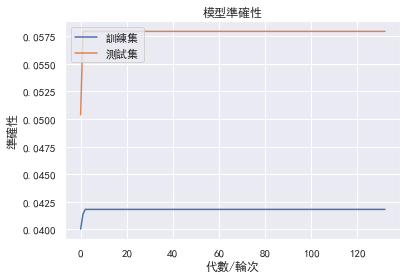

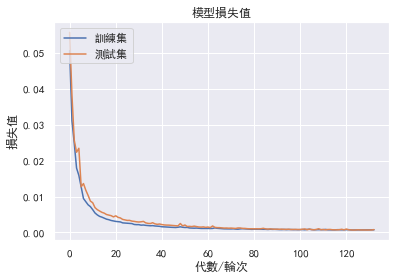

276/276 [==============================] - ETA:  - ETA:  - 0s 670us/step
loss:0.0021456118986901383
mean_absolute_error:0.03208829368046229
acc:0.03985507289568583


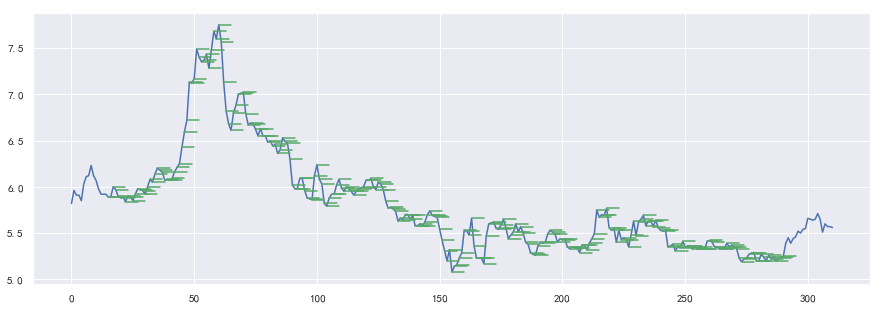

In [39]:
do('601398',train_epochs=5000,  window=15, days=5)

Train on 2244 samples, validate on 396 samples
Epoch 1/5000
 - 10s - loss: 0.0401 - mean_absolute_error: 0.1608 - acc: 0.0414 - val_loss: 0.0545 - val_mean_absolute_error: 0.1940 - val_acc: 0.0556
Epoch 2/5000
 - 6s - loss: 0.0246 - mean_absolute_error: 0.1212 - acc: 0.0410 - val_loss: 0.0239 - val_mean_absolute_error: 0.1263 - val_acc: 0.0581
Epoch 3/5000
 - 6s - loss: 0.0140 - mean_absolute_error: 0.0920 - acc: 0.0414 - val_loss: 0.0177 - val_mean_absolute_error: 0.1056 - val_acc: 0.0581
Epoch 4/5000
 - 6s - loss: 0.0108 - mean_absolute_error: 0.0826 - acc: 0.0414 - val_loss: 0.0171 - val_mean_absolute_error: 0.1079 - val_acc: 0.0581
Epoch 5/5000
 - 6s - loss: 0.0096 - mean_absolute_error: 0.0777 - acc: 0.0414 - val_loss: 0.0112 - val_mean_absolute_error: 0.0834 - val_acc: 0.0581
Epoch 6/5000
 - 6s - loss: 0.0093 - mean_absolute_error: 0.0753 - acc: 0.0414 - val_loss: 0.0126 - val_mean_absolute_error: 0.0905 - val_acc: 0.0581
Epoch 7/5000
 - 6s - loss: 0.0080 - mean_absolute_error: 0

Epoch 56/5000
 - 6s - loss: 0.0010 - mean_absolute_error: 0.0240 - acc: 0.0414 - val_loss: 0.0022 - val_mean_absolute_error: 0.0366 - val_acc: 0.0581
Epoch 57/5000
 - 6s - loss: 0.0010 - mean_absolute_error: 0.0238 - acc: 0.0414 - val_loss: 0.0019 - val_mean_absolute_error: 0.0336 - val_acc: 0.0581
Epoch 58/5000
 - 6s - loss: 0.0011 - mean_absolute_error: 0.0242 - acc: 0.0414 - val_loss: 0.0024 - val_mean_absolute_error: 0.0397 - val_acc: 0.0581
Epoch 59/5000
 - 6s - loss: 0.0010 - mean_absolute_error: 0.0239 - acc: 0.0414 - val_loss: 0.0021 - val_mean_absolute_error: 0.0362 - val_acc: 0.0581
Epoch 60/5000
 - 6s - loss: 9.8791e-04 - mean_absolute_error: 0.0231 - acc: 0.0414 - val_loss: 0.0018 - val_mean_absolute_error: 0.0332 - val_acc: 0.0581
Epoch 61/5000
 - 6s - loss: 9.7893e-04 - mean_absolute_error: 0.0231 - acc: 0.0414 - val_loss: 0.0017 - val_mean_absolute_error: 0.0310 - val_acc: 0.0581
Epoch 62/5000
 - 6s - loss: 0.0010 - mean_absolute_error: 0.0236 - acc: 0.0414 - val_loss: 0

Total params: 1,022,501
Trainable params: 1,022,501
Non-trainable params: 0
_________________________________________________________________


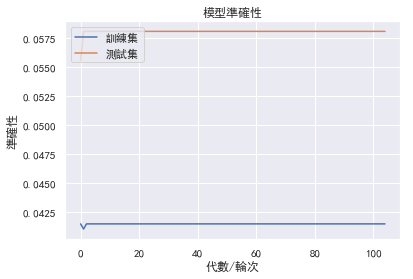

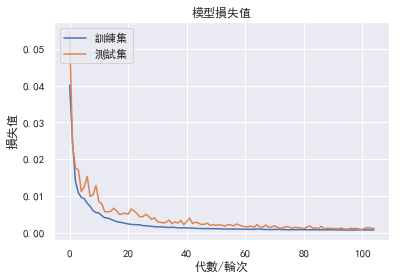

271/271 [==============================] - ETA:  - ETA:  - 0s 915us/step
loss:0.0020286090265206882
mean_absolute_error:0.03301264238423527
acc:0.03690036916864754


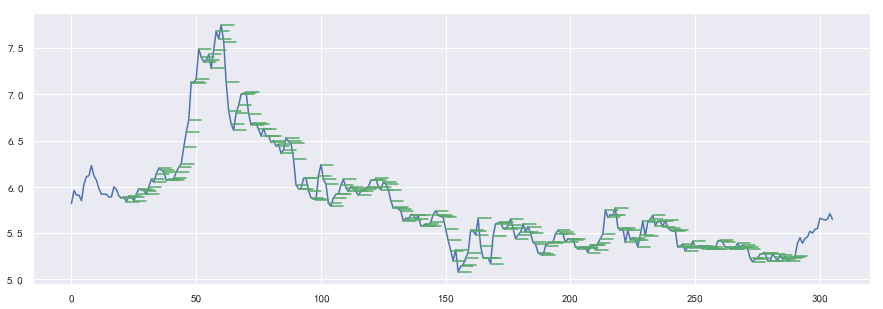

In [40]:
do('601398',train_epochs=5000,  window=20, days=5)

Train on 2239 samples, validate on 396 samples
Epoch 1/5000
 - 12s - loss: 0.0604 - mean_absolute_error: 0.1964 - acc: 0.0397 - val_loss: 0.0349 - val_mean_absolute_error: 0.1444 - val_acc: 0.0581
Epoch 2/5000
 - 7s - loss: 0.0299 - mean_absolute_error: 0.1386 - acc: 0.0415 - val_loss: 0.0278 - val_mean_absolute_error: 0.1319 - val_acc: 0.0581
Epoch 3/5000
 - 7s - loss: 0.0219 - mean_absolute_error: 0.1179 - acc: 0.0411 - val_loss: 0.0238 - val_mean_absolute_error: 0.1240 - val_acc: 0.0581
Epoch 4/5000
 - 7s - loss: 0.0193 - mean_absolute_error: 0.1081 - acc: 0.0411 - val_loss: 0.0333 - val_mean_absolute_error: 0.1485 - val_acc: 0.0581
Epoch 5/5000
 - 7s - loss: 0.0180 - mean_absolute_error: 0.1064 - acc: 0.0415 - val_loss: 0.0223 - val_mean_absolute_error: 0.1180 - val_acc: 0.0581
Epoch 6/5000
 - 7s - loss: 0.0131 - mean_absolute_error: 0.0888 - acc: 0.0415 - val_loss: 0.0157 - val_mean_absolute_error: 0.1002 - val_acc: 0.0581
Epoch 7/5000
 - 7s - loss: 0.0104 - mean_absolute_error: 0

Epoch 56/5000
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0255 - acc: 0.0415 - val_loss: 0.0017 - val_mean_absolute_error: 0.0320 - val_acc: 0.0581
Epoch 57/5000
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0256 - acc: 0.0415 - val_loss: 0.0017 - val_mean_absolute_error: 0.0314 - val_acc: 0.0581
Epoch 58/5000
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0255 - acc: 0.0415 - val_loss: 0.0018 - val_mean_absolute_error: 0.0318 - val_acc: 0.0581
Epoch 59/5000
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0250 - acc: 0.0415 - val_loss: 0.0017 - val_mean_absolute_error: 0.0314 - val_acc: 0.0581
Epoch 60/5000
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0250 - acc: 0.0415 - val_loss: 0.0019 - val_mean_absolute_error: 0.0346 - val_acc: 0.0581
Epoch 61/5000
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0256 - acc: 0.0415 - val_loss: 0.0016 - val_mean_absolute_error: 0.0309 - val_acc: 0.0581
Epoch 62/5000
 - 7s - loss: 0.0011 - mean_absolute_error: 0.0246 - acc: 0.0415 - val_loss: 0.0016 - 

Epoch 110/5000
 - 7s - loss: 8.0617e-04 - mean_absolute_error: 0.0209 - acc: 0.0415 - val_loss: 0.0010 - val_mean_absolute_error: 0.0238 - val_acc: 0.0581
Epoch 111/5000
 - 8s - loss: 7.9840e-04 - mean_absolute_error: 0.0209 - acc: 0.0415 - val_loss: 0.0011 - val_mean_absolute_error: 0.0239 - val_acc: 0.0581
Epoch 112/5000
 - 7s - loss: 7.7749e-04 - mean_absolute_error: 0.0204 - acc: 0.0415 - val_loss: 0.0010 - val_mean_absolute_error: 0.0236 - val_acc: 0.0581
Epoch 00112: early stopping
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 500)               1022000   
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 501       
Total params: 1,022,501
Trainable params: 1,022,501
Non-trainable params: 0
_________________________________________________________________


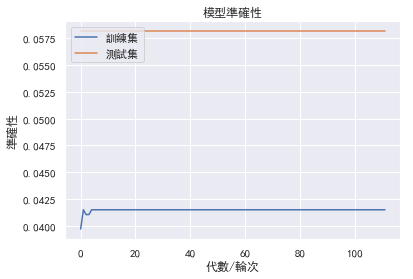

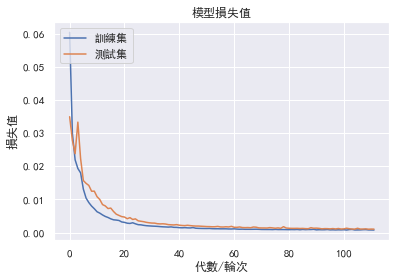

266/266 [==============================] - ETA:  - ETA:  - 0s 1ms/step
loss:0.002370964813648366
mean_absolute_error:0.035692649592358364
acc:0.03759398507444482


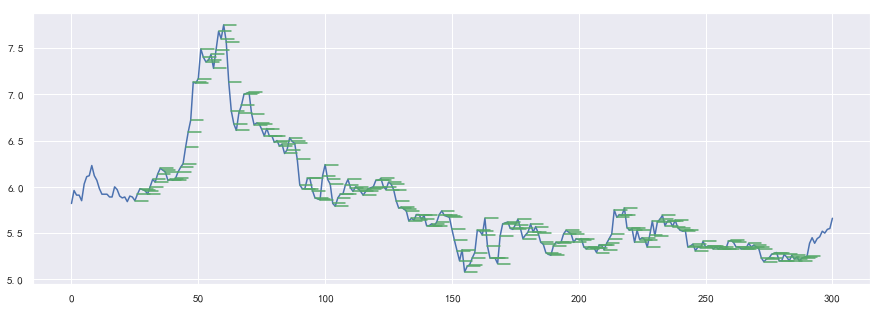

In [41]:
do('601398',train_epochs=5000,  window=25, days=5)

Train on 2235 samples, validate on 395 samples
Epoch 1/5000
 - 14s - loss: 0.0624 - mean_absolute_error: 0.1916 - acc: 0.0407 - val_loss: 0.0291 - val_mean_absolute_error: 0.1298 - val_acc: 0.0582
Epoch 2/5000
 - 9s - loss: 0.0215 - mean_absolute_error: 0.1149 - acc: 0.0416 - val_loss: 0.0246 - val_mean_absolute_error: 0.1235 - val_acc: 0.0582
Epoch 3/5000
 - 9s - loss: 0.0210 - mean_absolute_error: 0.1135 - acc: 0.0416 - val_loss: 0.0301 - val_mean_absolute_error: 0.1396 - val_acc: 0.0582
Epoch 4/5000
 - 9s - loss: 0.0210 - mean_absolute_error: 0.1123 - acc: 0.0416 - val_loss: 0.0164 - val_mean_absolute_error: 0.0997 - val_acc: 0.0582
Epoch 5/5000
 - 9s - loss: 0.0155 - mean_absolute_error: 0.0981 - acc: 0.0416 - val_loss: 0.0138 - val_mean_absolute_error: 0.0944 - val_acc: 0.0582
Epoch 6/5000
 - 9s - loss: 0.0126 - mean_absolute_error: 0.0880 - acc: 0.0416 - val_loss: 0.0141 - val_mean_absolute_error: 0.0957 - val_acc: 0.0582
Epoch 7/5000
 - 9s - loss: 0.0106 - mean_absolute_error: 0

Epoch 56/5000
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0262 - acc: 0.0416 - val_loss: 0.0013 - val_mean_absolute_error: 0.0286 - val_acc: 0.0582
Epoch 57/5000
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0258 - acc: 0.0416 - val_loss: 0.0013 - val_mean_absolute_error: 0.0281 - val_acc: 0.0582
Epoch 58/5000
 - 8s - loss: 0.0012 - mean_absolute_error: 0.0257 - acc: 0.0416 - val_loss: 0.0014 - val_mean_absolute_error: 0.0291 - val_acc: 0.0582
Epoch 59/5000
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0258 - acc: 0.0416 - val_loss: 0.0013 - val_mean_absolute_error: 0.0281 - val_acc: 0.0582
Epoch 60/5000
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0252 - acc: 0.0416 - val_loss: 0.0013 - val_mean_absolute_error: 0.0276 - val_acc: 0.0582
Epoch 61/5000
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0254 - acc: 0.0416 - val_loss: 0.0012 - val_mean_absolute_error: 0.0273 - val_acc: 0.0582
Epoch 62/5000
 - 9s - loss: 0.0012 - mean_absolute_error: 0.0251 - acc: 0.0416 - val_loss: 0.0013 - 

Epoch 110/5000
 - 9s - loss: 8.7036e-04 - mean_absolute_error: 0.0214 - acc: 0.0416 - val_loss: 8.0915e-04 - val_mean_absolute_error: 0.0218 - val_acc: 0.0582
Epoch 111/5000
 - 9s - loss: 8.2009e-04 - mean_absolute_error: 0.0206 - acc: 0.0416 - val_loss: 9.1936e-04 - val_mean_absolute_error: 0.0234 - val_acc: 0.0582
Epoch 112/5000
 - 9s - loss: 8.9819e-04 - mean_absolute_error: 0.0218 - acc: 0.0416 - val_loss: 7.8113e-04 - val_mean_absolute_error: 0.0213 - val_acc: 0.0582
Epoch 113/5000
 - 9s - loss: 8.2605e-04 - mean_absolute_error: 0.0207 - acc: 0.0416 - val_loss: 8.0272e-04 - val_mean_absolute_error: 0.0216 - val_acc: 0.0582
Epoch 114/5000
 - 9s - loss: 8.4165e-04 - mean_absolute_error: 0.0209 - acc: 0.0416 - val_loss: 7.8304e-04 - val_mean_absolute_error: 0.0213 - val_acc: 0.0582
Epoch 115/5000
 - 8s - loss: 8.1578e-04 - mean_absolute_error: 0.0204 - acc: 0.0416 - val_loss: 8.6832e-04 - val_mean_absolute_error: 0.0226 - val_acc: 0.0582
Epoch 116/5000
 - 9s - loss: 7.9880e-04 - mean

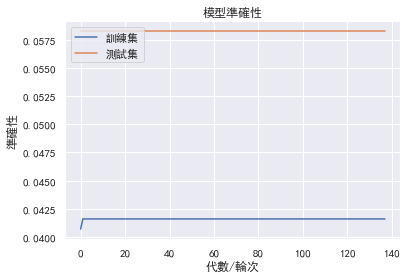

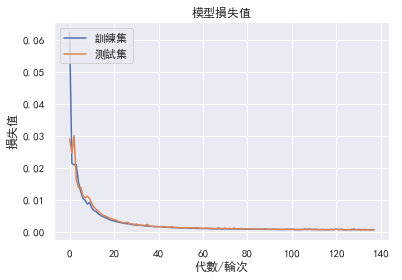

261/261 [==============================] - ETA:  - ETA:  - 0s 1ms/step
loss:0.0021045126245710357
mean_absolute_error:0.032489488978952284
acc:0.034482758620689655


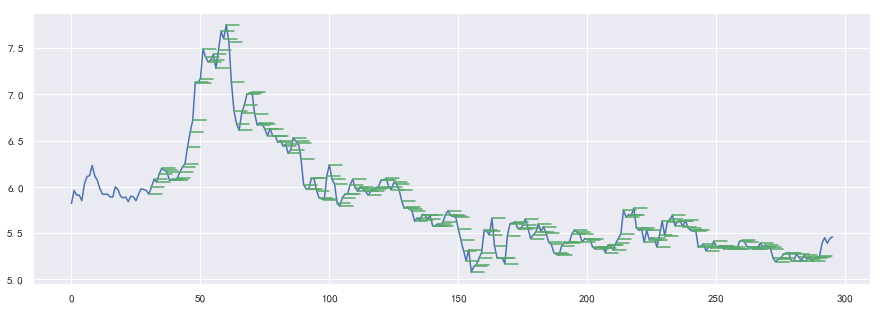

In [ ]:
do('601398',train_epochs=5000,  window=30, days=5)

Train on 2231 samples, validate on 394 samples
Epoch 1/5000
 - 16s - loss: 0.0951 - mean_absolute_error: 0.2429 - acc: 0.0372 - val_loss: 0.0543 - val_mean_absolute_error: 0.1895 - val_acc: 0.0584
Epoch 2/5000
 - 10s - loss: 0.0436 - mean_absolute_error: 0.1689 - acc: 0.0417 - val_loss: 0.0294 - val_mean_absolute_error: 0.1392 - val_acc: 0.0584
Epoch 3/5000
 - 11s - loss: 0.0252 - mean_absolute_error: 0.1261 - acc: 0.0417 - val_loss: 0.0238 - val_mean_absolute_error: 0.1252 - val_acc: 0.0584
Epoch 4/5000
 - 11s - loss: 0.0202 - mean_absolute_error: 0.1131 - acc: 0.0417 - val_loss: 0.0244 - val_mean_absolute_error: 0.1245 - val_acc: 0.0584
Epoch 5/5000
 - 10s - loss: 0.0185 - mean_absolute_error: 0.1093 - acc: 0.0417 - val_loss: 0.0211 - val_mean_absolute_error: 0.1171 - val_acc: 0.0584
Epoch 6/5000
 - 12s - loss: 0.0156 - mean_absolute_error: 0.0989 - acc: 0.0417 - val_loss: 0.0124 - val_mean_absolute_error: 0.0875 - val_acc: 0.0584
Epoch 7/5000
 - 11s - loss: 0.0131 - mean_absolute_er

Epoch 55/5000
 - 10s - loss: 0.0013 - mean_absolute_error: 0.0272 - acc: 0.0417 - val_loss: 0.0025 - val_mean_absolute_error: 0.0354 - val_acc: 0.0584
Epoch 56/5000
 - 11s - loss: 0.0011 - mean_absolute_error: 0.0257 - acc: 0.0417 - val_loss: 0.0022 - val_mean_absolute_error: 0.0335 - val_acc: 0.0584
Epoch 57/5000
 - 10s - loss: 0.0012 - mean_absolute_error: 0.0265 - acc: 0.0417 - val_loss: 0.0024 - val_mean_absolute_error: 0.0344 - val_acc: 0.0584
Epoch 58/5000
 - 11s - loss: 0.0012 - mean_absolute_error: 0.0258 - acc: 0.0417 - val_loss: 0.0022 - val_mean_absolute_error: 0.0333 - val_acc: 0.0584
Epoch 59/5000
 - 10s - loss: 0.0012 - mean_absolute_error: 0.0267 - acc: 0.0417 - val_loss: 0.0022 - val_mean_absolute_error: 0.0351 - val_acc: 0.0584
Epoch 60/5000
 - 11s - loss: 0.0012 - mean_absolute_error: 0.0263 - acc: 0.0417 - val_loss: 0.0024 - val_mean_absolute_error: 0.0339 - val_acc: 0.0584
Epoch 61/5000
 - 11s - loss: 0.0011 - mean_absolute_error: 0.0252 - acc: 0.0417 - val_loss: 0.

Epoch 109/5000
 - 11s - loss: 8.4241e-04 - mean_absolute_error: 0.0212 - acc: 0.0417 - val_loss: 0.0016 - val_mean_absolute_error: 0.0271 - val_acc: 0.0584
Epoch 110/5000
 - 11s - loss: 8.4799e-04 - mean_absolute_error: 0.0213 - acc: 0.0417 - val_loss: 0.0020 - val_mean_absolute_error: 0.0313 - val_acc: 0.0584
Epoch 111/5000
 - 10s - loss: 8.4094e-04 - mean_absolute_error: 0.0213 - acc: 0.0417 - val_loss: 0.0015 - val_mean_absolute_error: 0.0263 - val_acc: 0.0584
Epoch 112/5000
 - 11s - loss: 8.5231e-04 - mean_absolute_error: 0.0216 - acc: 0.0417 - val_loss: 0.0017 - val_mean_absolute_error: 0.0280 - val_acc: 0.0584
Epoch 113/5000
 - 10s - loss: 8.1505e-04 - mean_absolute_error: 0.0205 - acc: 0.0417 - val_loss: 0.0016 - val_mean_absolute_error: 0.0268 - val_acc: 0.0584
Epoch 114/5000
 - 11s - loss: 8.9623e-04 - mean_absolute_error: 0.0221 - acc: 0.0417 - val_loss: 0.0015 - val_mean_absolute_error: 0.0265 - val_acc: 0.0584
Epoch 00114: early stopping
____________________________________

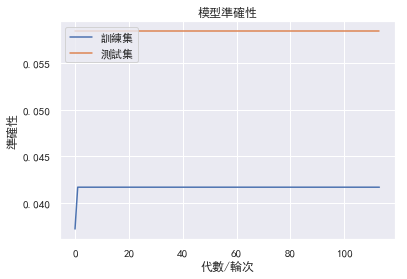

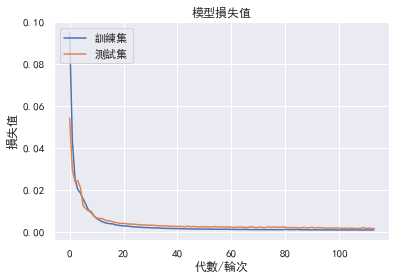

256/256 [==============================] - ETA:  - 0s 1ms/step
loss:0.0020357000757940114
mean_absolute_error:0.03205429669469595
acc:0.03515625


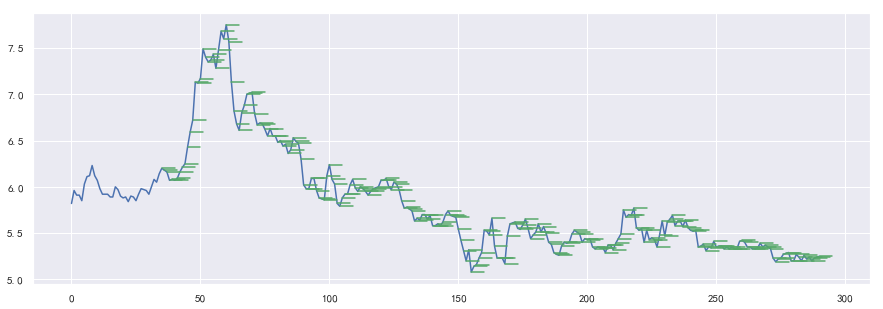

In [ ]:
do('601398',train_epochs=5000,  window=35, days=5)

Train on 2227 samples, validate on 393 samples
Epoch 1/5000
 - 18s - loss: 0.0776 - mean_absolute_error: 0.2110 - acc: 0.0391 - val_loss: 0.0693 - val_mean_absolute_error: 0.2213 - val_acc: 0.0509
Epoch 2/5000
 - 12s - loss: 0.0399 - mean_absolute_error: 0.1453 - acc: 0.0404 - val_loss: 0.0425 - val_mean_absolute_error: 0.1585 - val_acc: 0.0483
Epoch 3/5000
 - 12s - loss: 0.0254 - mean_absolute_error: 0.1170 - acc: 0.0413 - val_loss: 0.0285 - val_mean_absolute_error: 0.1270 - val_acc: 0.0534
Epoch 4/5000
 - 12s - loss: 0.0191 - mean_absolute_error: 0.1033 - acc: 0.0418 - val_loss: 0.0205 - val_mean_absolute_error: 0.1094 - val_acc: 0.0585
Epoch 5/5000
 - 12s - loss: 0.0149 - mean_absolute_error: 0.0938 - acc: 0.0418 - val_loss: 0.0120 - val_mean_absolute_error: 0.0877 - val_acc: 0.0585
Epoch 6/5000
 - 13s - loss: 0.0116 - mean_absolute_error: 0.0841 - acc: 0.0418 - val_loss: 0.0091 - val_mean_absolute_error: 0.0749 - val_acc: 0.0585
Epoch 7/5000
 - 13s - loss: 0.0092 - mean_absolute_er

Epoch 55/5000
 - 13s - loss: 0.0014 - mean_absolute_error: 0.0282 - acc: 0.0418 - val_loss: 0.0016 - val_mean_absolute_error: 0.0309 - val_acc: 0.0585
Epoch 56/5000
 - 14s - loss: 0.0013 - mean_absolute_error: 0.0277 - acc: 0.0418 - val_loss: 0.0015 - val_mean_absolute_error: 0.0306 - val_acc: 0.0585
Epoch 57/5000
 - 12s - loss: 0.0013 - mean_absolute_error: 0.0278 - acc: 0.0418 - val_loss: 0.0014 - val_mean_absolute_error: 0.0287 - val_acc: 0.0585
Epoch 58/5000
 - 12s - loss: 0.0012 - mean_absolute_error: 0.0267 - acc: 0.0418 - val_loss: 0.0014 - val_mean_absolute_error: 0.0282 - val_acc: 0.0585
Epoch 59/5000
 - 12s - loss: 0.0012 - mean_absolute_error: 0.0266 - acc: 0.0418 - val_loss: 0.0013 - val_mean_absolute_error: 0.0280 - val_acc: 0.0585
Epoch 60/5000
 - 12s - loss: 0.0013 - mean_absolute_error: 0.0271 - acc: 0.0418 - val_loss: 0.0016 - val_mean_absolute_error: 0.0313 - val_acc: 0.0585
Epoch 61/5000
 - 13s - loss: 0.0012 - mean_absolute_error: 0.0260 - acc: 0.0418 - val_loss: 0.

Epoch 109/5000
 - 12s - loss: 8.4390e-04 - mean_absolute_error: 0.0215 - acc: 0.0418 - val_loss: 9.4250e-04 - val_mean_absolute_error: 0.0234 - val_acc: 0.0585
Epoch 110/5000
 - 12s - loss: 9.3813e-04 - mean_absolute_error: 0.0230 - acc: 0.0418 - val_loss: 0.0014 - val_mean_absolute_error: 0.0302 - val_acc: 0.0585
Epoch 111/5000
 - 12s - loss: 9.7382e-04 - mean_absolute_error: 0.0238 - acc: 0.0418 - val_loss: 8.6005e-04 - val_mean_absolute_error: 0.0221 - val_acc: 0.0585
Epoch 112/5000
 - 12s - loss: 8.5774e-04 - mean_absolute_error: 0.0218 - acc: 0.0418 - val_loss: 9.3344e-04 - val_mean_absolute_error: 0.0234 - val_acc: 0.0585
Epoch 113/5000
 - 12s - loss: 8.0642e-04 - mean_absolute_error: 0.0209 - acc: 0.0418 - val_loss: 9.9035e-04 - val_mean_absolute_error: 0.0241 - val_acc: 0.0585
Epoch 114/5000
 - 12s - loss: 8.1853e-04 - mean_absolute_error: 0.0209 - acc: 0.0418 - val_loss: 9.4111e-04 - val_mean_absolute_error: 0.0235 - val_acc: 0.0585
Epoch 115/5000
 - 12s - loss: 8.2061e-04 - m

Epoch 161/5000
 - 12s - loss: 7.5636e-04 - mean_absolute_error: 0.0200 - acc: 0.0418 - val_loss: 9.7909e-04 - val_mean_absolute_error: 0.0243 - val_acc: 0.0585
Epoch 162/5000
 - 12s - loss: 7.6696e-04 - mean_absolute_error: 0.0203 - acc: 0.0418 - val_loss: 7.3145e-04 - val_mean_absolute_error: 0.0205 - val_acc: 0.0585
Epoch 163/5000
 - 12s - loss: 7.4943e-04 - mean_absolute_error: 0.0198 - acc: 0.0418 - val_loss: 8.2078e-04 - val_mean_absolute_error: 0.0223 - val_acc: 0.0585
Epoch 164/5000
 - 12s - loss: 7.3217e-04 - mean_absolute_error: 0.0195 - acc: 0.0418 - val_loss: 7.6572e-04 - val_mean_absolute_error: 0.0209 - val_acc: 0.0585
Epoch 00164: early stopping
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 500)               1022000   
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 501       
To

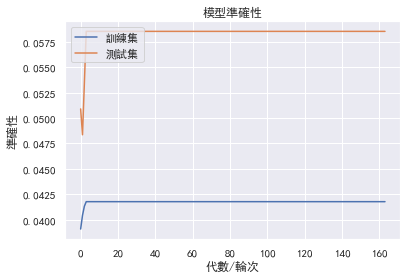

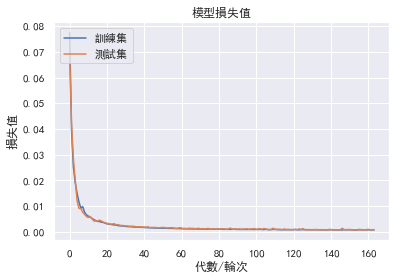

251/251 [==============================] - ETA:  - 0s 2ms/step
loss:0.0026102879453836327
mean_absolute_error:0.03710840306285605
acc:0.035856574491794364


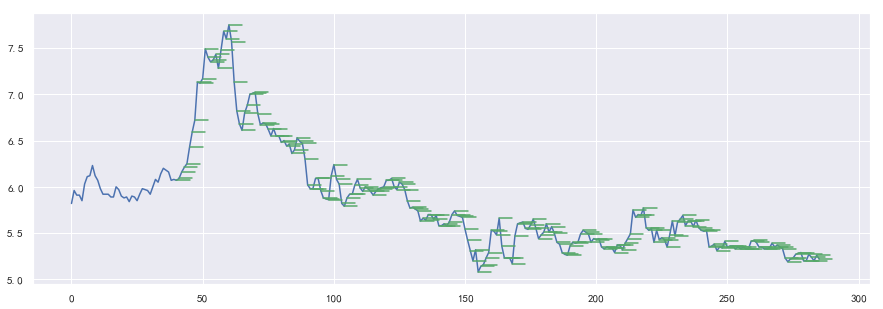

In [ ]:
do('601398',train_epochs=5000,  window=40, days=5)

Train on 2222 samples, validate on 393 samples
Epoch 1/5000
 - 20s - loss: 0.3059 - mean_absolute_error: 0.4367 - acc: 0.0275 - val_loss: 0.0769 - val_mean_absolute_error: 0.2286 - val_acc: 0.0560
Epoch 2/5000
 - 15s - loss: 0.0430 - mean_absolute_error: 0.1673 - acc: 0.0419 - val_loss: 0.0296 - val_mean_absolute_error: 0.1353 - val_acc: 0.0585
Epoch 3/5000
 - 14s - loss: 0.0294 - mean_absolute_error: 0.1369 - acc: 0.0419 - val_loss: 0.0212 - val_mean_absolute_error: 0.1129 - val_acc: 0.0585
Epoch 4/5000
 - 15s - loss: 0.0227 - mean_absolute_error: 0.1199 - acc: 0.0419 - val_loss: 0.0209 - val_mean_absolute_error: 0.1134 - val_acc: 0.0585
Epoch 5/5000
 - 14s - loss: 0.0224 - mean_absolute_error: 0.1195 - acc: 0.0419 - val_loss: 0.0203 - val_mean_absolute_error: 0.1138 - val_acc: 0.0585
Epoch 6/5000
 - 15s - loss: 0.0212 - mean_absolute_error: 0.1161 - acc: 0.0419 - val_loss: 0.0185 - val_mean_absolute_error: 0.1076 - val_acc: 0.0585
Epoch 7/5000
 - 15s - loss: 0.0193 - mean_absolute_er

Epoch 55/5000
 - 15s - loss: 0.0023 - mean_absolute_error: 0.0369 - acc: 0.0419 - val_loss: 0.0031 - val_mean_absolute_error: 0.0434 - val_acc: 0.0585
Epoch 56/5000
 - 15s - loss: 0.0022 - mean_absolute_error: 0.0363 - acc: 0.0419 - val_loss: 0.0032 - val_mean_absolute_error: 0.0444 - val_acc: 0.0585
Epoch 57/5000
 - 15s - loss: 0.0023 - mean_absolute_error: 0.0366 - acc: 0.0419 - val_loss: 0.0030 - val_mean_absolute_error: 0.0430 - val_acc: 0.0585
Epoch 58/5000
 - 15s - loss: 0.0022 - mean_absolute_error: 0.0359 - acc: 0.0419 - val_loss: 0.0031 - val_mean_absolute_error: 0.0438 - val_acc: 0.0585
Epoch 59/5000
 - 15s - loss: 0.0021 - mean_absolute_error: 0.0354 - acc: 0.0419 - val_loss: 0.0031 - val_mean_absolute_error: 0.0436 - val_acc: 0.0585
Epoch 60/5000
 - 15s - loss: 0.0021 - mean_absolute_error: 0.0351 - acc: 0.0419 - val_loss: 0.0030 - val_mean_absolute_error: 0.0429 - val_acc: 0.0585
Epoch 61/5000
 - 15s - loss: 0.0020 - mean_absolute_error: 0.0348 - acc: 0.0419 - val_loss: 0.

Epoch 110/5000
 - 15s - loss: 0.0011 - mean_absolute_error: 0.0249 - acc: 0.0419 - val_loss: 0.0014 - val_mean_absolute_error: 0.0283 - val_acc: 0.0585
Epoch 111/5000
 - 14s - loss: 0.0011 - mean_absolute_error: 0.0251 - acc: 0.0419 - val_loss: 0.0014 - val_mean_absolute_error: 0.0288 - val_acc: 0.0585
Epoch 112/5000
 - 15s - loss: 0.0011 - mean_absolute_error: 0.0247 - acc: 0.0419 - val_loss: 0.0014 - val_mean_absolute_error: 0.0283 - val_acc: 0.0585
Epoch 113/5000
 - 15s - loss: 0.0011 - mean_absolute_error: 0.0247 - acc: 0.0419 - val_loss: 0.0015 - val_mean_absolute_error: 0.0306 - val_acc: 0.0585
Epoch 114/5000
 - 15s - loss: 0.0011 - mean_absolute_error: 0.0249 - acc: 0.0419 - val_loss: 0.0016 - val_mean_absolute_error: 0.0312 - val_acc: 0.0585
Epoch 115/5000
 - 15s - loss: 0.0011 - mean_absolute_error: 0.0247 - acc: 0.0419 - val_loss: 0.0014 - val_mean_absolute_error: 0.0277 - val_acc: 0.0585
Epoch 116/5000
 - 16s - loss: 0.0010 - mean_absolute_error: 0.0243 - acc: 0.0419 - val_l

Epoch 163/5000
 - 15s - loss: 8.4173e-04 - mean_absolute_error: 0.0215 - acc: 0.0419 - val_loss: 9.7108e-04 - val_mean_absolute_error: 0.0237 - val_acc: 0.0585
Epoch 164/5000
 - 14s - loss: 8.2773e-04 - mean_absolute_error: 0.0211 - acc: 0.0419 - val_loss: 9.5822e-04 - val_mean_absolute_error: 0.0236 - val_acc: 0.0585
Epoch 165/5000
 - 15s - loss: 8.2241e-04 - mean_absolute_error: 0.0211 - acc: 0.0419 - val_loss: 9.6834e-04 - val_mean_absolute_error: 0.0233 - val_acc: 0.0585
Epoch 166/5000
 - 15s - loss: 8.1864e-04 - mean_absolute_error: 0.0211 - acc: 0.0419 - val_loss: 9.3865e-04 - val_mean_absolute_error: 0.0232 - val_acc: 0.0585
Epoch 167/5000
 - 14s - loss: 8.1700e-04 - mean_absolute_error: 0.0209 - acc: 0.0419 - val_loss: 9.3385e-04 - val_mean_absolute_error: 0.0233 - val_acc: 0.0585
Epoch 168/5000
 - 15s - loss: 7.9866e-04 - mean_absolute_error: 0.0208 - acc: 0.0419 - val_loss: 9.3093e-04 - val_mean_absolute_error: 0.0231 - val_acc: 0.0585
Epoch 169/5000
 - 15s - loss: 8.0675e-04

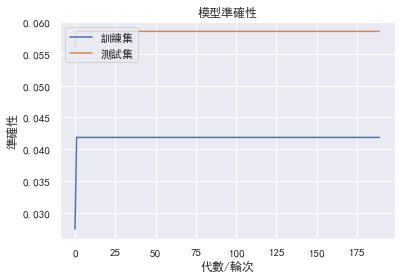

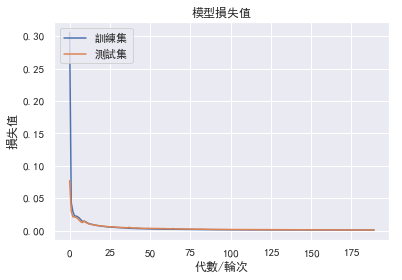

246/246 [==============================] - ETA:  - 1s 3ms/step
loss:0.0021081593434697367
mean_absolute_error:0.032993106974091954
acc:0.036585365459928666
timed out
'NoneType' object is not subscriptable


Traceback (most recent call last):
  File "<ipython-input-37-4551518c08cf>", line 43, in do
    start=dataloader._df_valid.index[0].strftime('%Y-%m-%d'), online=True)
  File "D:\Github\LSTM-for-Stock\LSTM_for_Stock\data_processor.py", line 100, in __init__
    self.data = self._stock_df[columns].join(self._benchmark_df[columns],
TypeError: 'NoneType' object is not subscriptable


In [ ]:
do('601398',train_epochs=5000,  window=45, days=5)

In [ ]:
do('601398',train_epochs=5000,  window=50, days=5)

Train on 2218 samples, validate on 392 samples
Epoch 1/5000
 - 26s - loss: 0.1982 - mean_absolute_error: 0.3316 - acc: 0.0365 - val_loss: 0.0502 - val_mean_absolute_error: 0.1767 - val_acc: 0.0561
Epoch 2/5000
 - 20s - loss: 0.0464 - mean_absolute_error: 0.1738 - acc: 0.0419 - val_loss: 0.0417 - val_mean_absolute_error: 0.1671 - val_acc: 0.0561
Epoch 3/5000
 - 21s - loss: 0.0278 - mean_absolute_error: 0.1295 - acc: 0.0424 - val_loss: 0.0276 - val_mean_absolute_error: 0.1357 - val_acc: 0.0561
Epoch 4/5000
 - 20s - loss: 0.0207 - mean_absolute_error: 0.1142 - acc: 0.0424 - val_loss: 0.0219 - val_mean_absolute_error: 0.1204 - val_acc: 0.0561
Epoch 5/5000
 - 21s - loss: 0.0233 - mean_absolute_error: 0.1177 - acc: 0.0424 - val_loss: 0.0232 - val_mean_absolute_error: 0.1216 - val_acc: 0.0561
Epoch 6/5000
 - 21s - loss: 0.0182 - mean_absolute_error: 0.1035 - acc: 0.0424 - val_loss: 0.0198 - val_mean_absolute_error: 0.1162 - val_acc: 0.0561
Epoch 7/5000
 - 20s - loss: 0.0145 - mean_absolute_er

Epoch 55/5000
 - 20s - loss: 0.0019 - mean_absolute_error: 0.0341 - acc: 0.0424 - val_loss: 0.0035 - val_mean_absolute_error: 0.0470 - val_acc: 0.0561
Epoch 56/5000
 - 20s - loss: 0.0019 - mean_absolute_error: 0.0338 - acc: 0.0424 - val_loss: 0.0034 - val_mean_absolute_error: 0.0458 - val_acc: 0.0561
Epoch 57/5000
 - 20s - loss: 0.0018 - mean_absolute_error: 0.0329 - acc: 0.0424 - val_loss: 0.0035 - val_mean_absolute_error: 0.0467 - val_acc: 0.0561
Epoch 58/5000
 - 20s - loss: 0.0018 - mean_absolute_error: 0.0326 - acc: 0.0424 - val_loss: 0.0033 - val_mean_absolute_error: 0.0455 - val_acc: 0.0561
Epoch 59/5000
 - 20s - loss: 0.0018 - mean_absolute_error: 0.0331 - acc: 0.0424 - val_loss: 0.0032 - val_mean_absolute_error: 0.0447 - val_acc: 0.0561
Epoch 60/5000
 - 20s - loss: 0.0018 - mean_absolute_error: 0.0327 - acc: 0.0424 - val_loss: 0.0032 - val_mean_absolute_error: 0.0448 - val_acc: 0.0561
Epoch 61/5000
 - 20s - loss: 0.0017 - mean_absolute_error: 0.0324 - acc: 0.0424 - val_loss: 0.

Epoch 110/5000
 - 20s - loss: 0.0010 - mean_absolute_error: 0.0244 - acc: 0.0424 - val_loss: 0.0017 - val_mean_absolute_error: 0.0314 - val_acc: 0.0561
Epoch 111/5000
 - 21s - loss: 0.0010 - mean_absolute_error: 0.0242 - acc: 0.0424 - val_loss: 0.0017 - val_mean_absolute_error: 0.0314 - val_acc: 0.0561
Epoch 112/5000
 - 21s - loss: 0.0010 - mean_absolute_error: 0.0243 - acc: 0.0424 - val_loss: 0.0019 - val_mean_absolute_error: 0.0337 - val_acc: 0.0561
Epoch 113/5000
 - 20s - loss: 0.0011 - mean_absolute_error: 0.0247 - acc: 0.0424 - val_loss: 0.0016 - val_mean_absolute_error: 0.0312 - val_acc: 0.0561
Epoch 114/5000
 - 20s - loss: 0.0010 - mean_absolute_error: 0.0244 - acc: 0.0424 - val_loss: 0.0015 - val_mean_absolute_error: 0.0297 - val_acc: 0.0561
Epoch 115/5000
 - 20s - loss: 0.0010 - mean_absolute_error: 0.0238 - acc: 0.0424 - val_loss: 0.0015 - val_mean_absolute_error: 0.0297 - val_acc: 0.0561
Epoch 116/5000
 - 21s - loss: 0.0010 - mean_absolute_error: 0.0238 - acc: 0.0424 - val_l

Epoch 163/5000
 - 20s - loss: 8.5333e-04 - mean_absolute_error: 0.0217 - acc: 0.0424 - val_loss: 0.0013 - val_mean_absolute_error: 0.0265 - val_acc: 0.0561
Epoch 164/5000
 - 20s - loss: 8.2687e-04 - mean_absolute_error: 0.0213 - acc: 0.0424 - val_loss: 0.0011 - val_mean_absolute_error: 0.0239 - val_acc: 0.0561
Epoch 165/5000
 - 20s - loss: 8.0557e-04 - mean_absolute_error: 0.0209 - acc: 0.0424 - val_loss: 0.0011 - val_mean_absolute_error: 0.0248 - val_acc: 0.0561
Epoch 166/5000
 - 20s - loss: 8.1859e-04 - mean_absolute_error: 0.0211 - acc: 0.0424 - val_loss: 0.0011 - val_mean_absolute_error: 0.0245 - val_acc: 0.0561
Epoch 167/5000
 - 20s - loss: 7.9176e-04 - mean_absolute_error: 0.0206 - acc: 0.0424 - val_loss: 0.0011 - val_mean_absolute_error: 0.0241 - val_acc: 0.0561
Epoch 168/5000
 - 20s - loss: 7.7198e-04 - mean_absolute_error: 0.0202 - acc: 0.0424 - val_loss: 0.0011 - val_mean_absolute_error: 0.0248 - val_acc: 0.0561
Epoch 169/5000
 - 20s - loss: 7.9033e-04 - mean_absolute_error: 

In [ ]:
do('601398',train_epochs=5000,  window=55, days=5)

In [ ]:
do('601398',train_epochs=5000,  window=60, days=5)

In [ ]:
# class test_feature_appender(FeaturesAppender):
#     def _appendFeautres(self, df):
#         df["dayofweek"] = df.index.dayofweek
#         df["dayofyear"] = df.index.dayofyear
#         df["daysinmonth"] = df.index.daysinmonth
#         return df,["dayofweek","dayofyear","daysinmonth"]

# fea_app=test_feature_appender()

# do('601398',features_appender=fea_app)

In [ ]:
# class test_feature_appender1(FeaturesAppender):
#     def _appendFeautres(self, df):
#         df["dayofweek"] = df.index.dayofweek
#         df["dayofyear"] = df.index.dayofyear
#         df["daysinmonth"] = df.index.daysinmonth
#         return df,["dayofweek","dayofyear","daysinmonth"]
    
#     @property
#     def feature_columns(self) -> dict:
#         return {}

# fea_app=test_feature_appender1()

# do('601398',window=30,days=5)